In [ ]:
import tensorflow as tf

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2,random_state=42)

In [ ]:
# 정규화 또는 표준화 --> 스케일링
# 이미지는 픽셀당 값의 범위가 0 ~ 255 그래서 모든 픽셀을 255로 나누면 0 ~ 1 사이를 가지는 스케일링
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

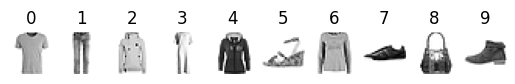

In [ ]:
import matplotlib.pyplot as plt
for i, idx in enumerate([np.where(y_train == i)[0][0] for i in range(10)]):
  plt.subplot(1,10,i+1)
  plt.title(i)
  plt.axis('off')
  plt.imshow(x_train[idx],cmap='gray_r')

분류

In [ ]:
# 딥러닝 신경망 구현
# 컴파일
# 학습(fit)
# evaluate x_test로 평가

In [ ]:
x_train.shape[1:]

(28, 28)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(10, input_shape=x_train.shape[1:]),
    tf.keras.layers.Input(shape = x_train.shape[1:]), # tf.keras.layers.Input(shape=[28,28])
    # 1차원으로 차원을 변경
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', # 최적화 방법
              loss='sparse_categorical_crossentropy',  # 손실함수
              metrics=['accuracy']) # 평가 방법

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7743 - loss: 0.6327 - val_accuracy: 0.8495 - val_loss: 0.4107
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8600 - loss: 0.3815 - val_accuracy: 0.8571 - val_loss: 0.3868
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8763 - loss: 0.3353 - val_accuracy: 0.8635 - val_loss: 0.3696
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8878 - loss: 0.3050 - val_accuracy: 0.8695 - val_loss: 0.3569
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8951 - loss: 0.2839 - val_accuracy: 0.8706 - val_loss: 0.3568
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9005 - loss: 0.2658 - val_accuracy: 0.8717 - val_loss: 0.3710
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9051 - loss: 0.2529 - val_accuracy: 0.8823 - val_loss: 0.3404
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9103 - loss: 0.2392 - 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

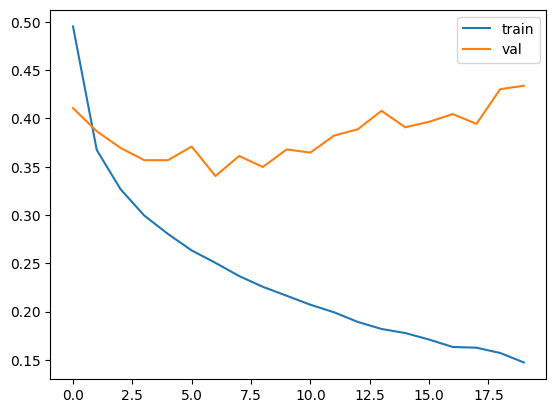

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

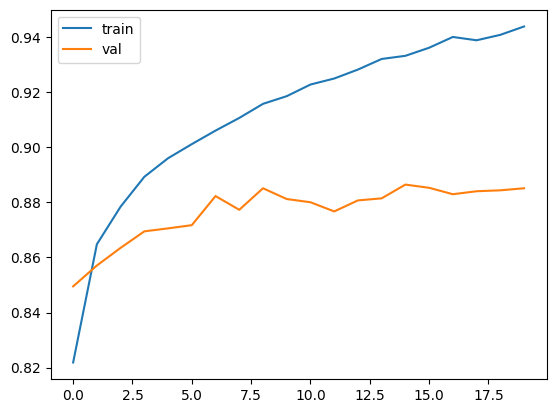

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()

<Axes: >

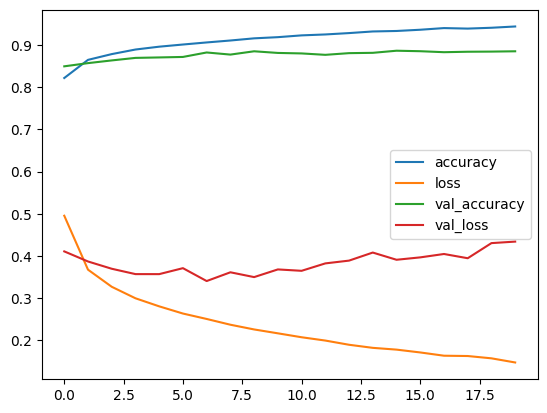

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8759 - loss: 0.4691


[0.46611288189888, 0.8769999742507935]

Dense 적용

In [ ]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
    # tf.keras.layers.Dense(10, input_shape=x_train.shape[1:]),
    tf.keras.layers.Input(shape = x_train.shape[1:]), # tf.keras.layers.Input(shape=[28,28])
    # 1차원으로 차원을 변경
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam', # 최적화 방법
              loss='sparse_categorical_crossentropy',  # 손실함수
              metrics=['accuracy']) # 평가 방법

In [ ]:
history = model2.fit(x_train, y_train, epochs=20, validation_data=(x_val,y_val),verbose=1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6568 - loss: 0.9569 - val_accuracy: 0.8372 - val_loss: 0.4506
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8083 - loss: 0.5455 - val_accuracy: 0.8495 - val_loss: 0.4036
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8265 - loss: 0.4887 - val_accuracy: 0.8547 - val_loss: 0.3861
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8338 - loss: 0.4677 - val_accuracy: 0.8616 - val_loss: 0.3716
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8416 - loss: 0.4500 - val_accuracy: 0.8638 - val_loss: 0.3748
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8446 - loss: 0.4341 - val_accuracy: 0.8657 - val_loss: 0.3587
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8494 - loss: 0.4205 - val_accuracy: 0.8674 - val_loss: 0.3544
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8489 - loss: 0.4213 - 

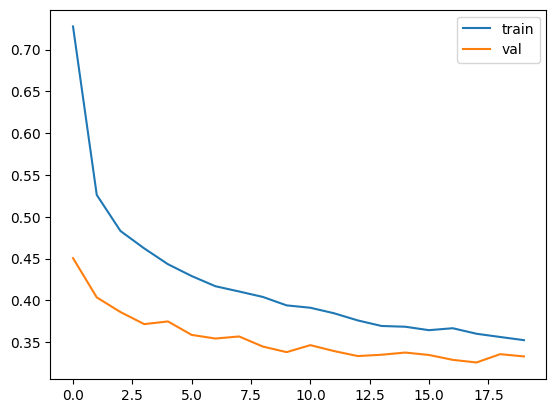

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

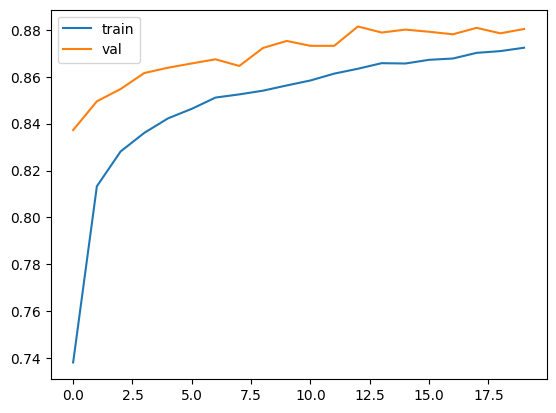

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()

<Axes: >

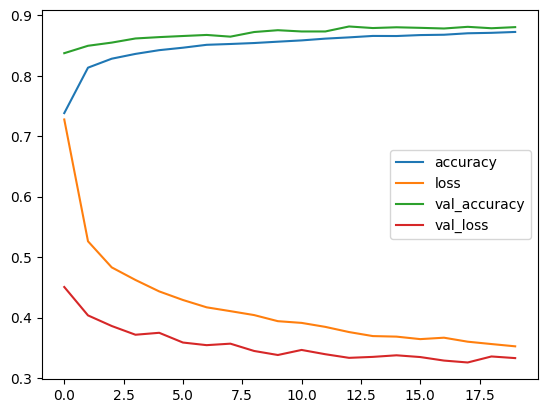

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8754 - loss: 0.3566


[0.356320858001709, 0.8763999938964844]

In [ ]:
# 예측
y_pred = model.predict(x_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.8156881e-11, 1.9351645e-13, 4.1948246e-12, 3.2640790e-13,
       4.3019590e-12, 6.5342071e-03, 6.4039891e-11, 7.4388692e-03,
       4.9158561e-10, 9.8602688e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

9

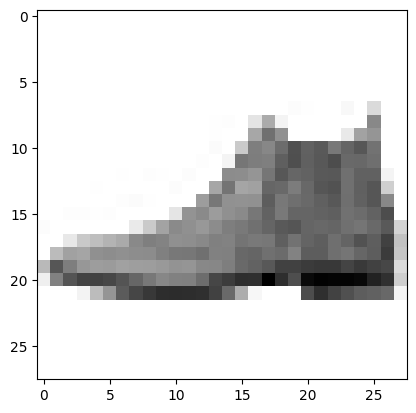

In [ ]:
plt.imshow(x_test[0],cmap='gray_r')
plt.show()

회귀

In [ ]:
from tensorflow import keras
input_ = keras.layers.Input(shape=x_test.shape[1:])
tf.keras.layers.Flatten()
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model3 = keras.Model(inputs=[input_],outputs=[output])

In [ ]:
model3.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 30)             │            270 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 30)             │            930 │ dense_29[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 38)             │              0 │ input_layer_14[0][0],  │
│ (Concatenate)             │                        │                │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 1)              │             39 │ concatenate_6[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 조립
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 와이드 & 딥 신경망
normalization_layer = keras.layers.Normalization()
housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full)
print(x_train.shape)

input_ = tf.keras.layers.Input(shape=x_test.shape[1:])
normalized = normalization_layer(input_)
hidden1 = keras.layers.Dense(30,activation='relu')(normalized)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([normalized,hidden2])
output = keras.layers.Dense(1)(concat)


(11610, 8)


In [ ]:
model3.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 30)             │            270 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 30)             │            930 │ dense_29[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 38)             │              0 │ input_layer_14[0][0],  │
│ (Concatenate)             │                        │                │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 1)              │             39 │ concatenate_6[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# API 연결방식
# 와이드 & 딥 신경망 (일부 경로를 적용)
input_wide = tf.keras.layers.Input(shape=[5]) # 와이드의 입력
normal_wide = tf.keras.layers.Normalization()(input_wide)

input_deep = tf.keras.layers.Input(shape=[6]) # 딥 신경망의 입력시퀀스하게 연결
normal_deep = tf.keras.layers.Normalization()(input_deep)

hidden1 = tf.keras.layers.Dense(30,activation='relu')(input_deep)
hidden2 = tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([normal_wide,hidden2]) # 와이드와 결합
output = tf.keras.layers.Dense(1)(concat)

model4 = keras.Model(inputs=[input_wide,input_deep],outputs=[output])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 28, 30)         │            870 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 28, 30)         │            930 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 28, 58)         │              0 │ input_layer_3[0][0],   │
│                           │                        │                │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 28, 1)          │             59 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,859 (7.26 KB)

 Trainable params: 1,859 (7.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
(x_train_full,y_train_full),(x_test,y_test) = tf.keras.datasets.california_housing.load_data()
x_train_full.shape, x_test.shape, y_train_full.shape, y_test.shape
x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full,test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((13209, 8), (3303, 8), (13209,), (3303,))

- 일반적인 딥러닝 신경망
  - API 방식
    - 객체를 만들고 객체 단위로 결합
    - 중간에 레이어를 삽입해도 되고, 삭제도 가능
    - 모델을 저장했을 때.. 불러와서 특정 레이어까지 잘라서 다음은 커스텀한 레이어를 추가
    - 결합할 때는 model을 이용 sequence 방식이 아님

In [ ]:
# 입력레이어
# 정규화 레이어
# 히든레이어를 2개
# 출력레이어

In [ ]:
# 샘플 데이터의 모양 shape
x_train.shape, x_train.shape[1:]

((13209, 8), (8,))

In [ ]:
input = tf.keras.layers.Input(shape=x_train.shape[1:])
normal = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30,activation='relu')
hidden2 = tf.keras.layers.Dense(30,activation='relu')
concat = tf.keras.layers.Concatenate() # 출력결과 합치기
output = tf.keras.layers.Dense(1)

x_ = normal(input)
x = hidden1(x_)
x = hidden2(x)
# x = concat([x,x_])
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])

In [ ]:
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['RootMeanSquaredError'])
history = model.fit(x_train,y_train,epochs=14,validation_data=(x_val,y_val))

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_25 (Normalization)     │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,248 (4.88 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 17 (72.00 B)

Epoch 1/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 222022.1719 - loss: 49483812864.0000 - val_RootMeanSquaredError: 163026.6562 - val_loss: 26577692672.0000
Epoch 2/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 163921.2344 - loss: 26883962880.0000 - val_RootMeanSquaredError: 159386.4844 - val_loss: 25404051456.0000
Epoch 3/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 159968.6094 - loss: 25603026944.0000 - val_RootMeanSquaredError: 154844.8906 - val_loss: 23976939520.0000
Epoch 4/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 154855.7344 - loss: 23992940544.0000 - val_RootMeanSquaredError: 148581.2969 - val_loss: 22076403712.0000
Epoch 5/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 147862.1250 - loss: 21875427328.0000 - val_RootMeanSquaredError: 140159.4688 - val_loss: 19644678144.0000
Epoch 6/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 138514.4844 - 

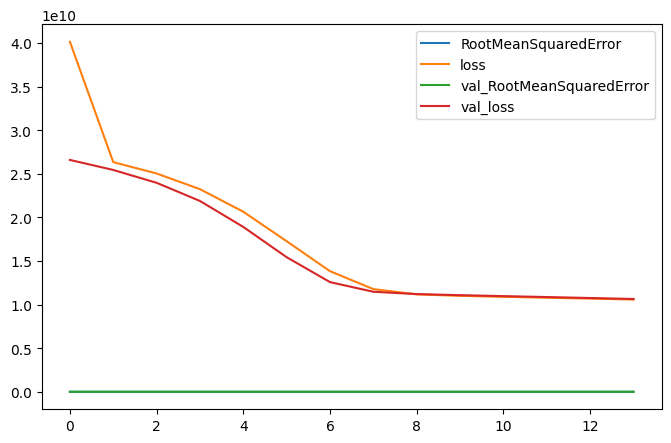

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.18487244844436646

In [ ]:
input = tf.keras.layers.Input(shape=x_train.shape[1:])
normal = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30,activation='relu')
hidden2 = tf.keras.layers.Dense(30,activation='relu')
concat = tf.keras.layers.Concatenate() # 출력결과 합치기
output = tf.keras.layers.Dense(1)

x_ = normal(input)
x = hidden1(x_)
x = hidden2(x)
x = concat([x,x_])
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])

In [ ]:
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['RootMeanSquaredError'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_34            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_26          │ (None, 8)              │             17 │ input_layer_34[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_76 (Dense)          │ (None, 30)             │            270 │ normalization_26[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_77 (Dense)          │ (None, 30)             │            930 │ dense_76[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_16            │ (None, 38)             │              0 │ dense_77[0][0],        │
│ (Concatenate)             │                        │                │ normalization_26[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_78 (Dense)          │ (None, 1)              │             39 │ concatenate_16[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - RootMeanSquaredError: 225040.1719 - loss: 50808848384.0000 - val_RootMeanSquaredError: 163591.3281 - val_loss: 26762121216.0000
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 164817.5469 - loss: 27179014144.0000 - val_RootMeanSquaredError: 160738.0625 - val_loss: 25836724224.0000
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 161828.7188 - loss: 26202091520.0000 - val_RootMeanSquaredError: 157547.1875 - val_loss: 24821118976.0000
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 158254.8906 - loss: 25057652736.0000 - val_RootMeanSquaredError: 153279.7969 - val_loss: 23494694912.0000
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 153377.6250 - loss: 23537195008.0000 - val_RootMeanSquaredError: 147198.3438 - val_loss: 21667352576.0000
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 146488.1406 - 

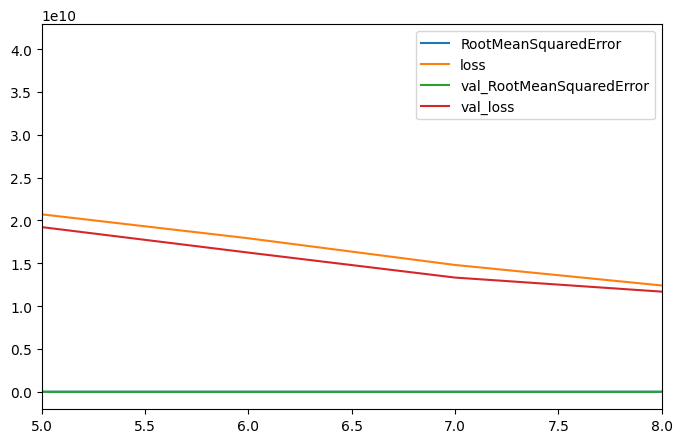

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5)))
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.21796035766601562

- 딥러닝 적용
  - 타이타닉 생존자 분류
  - iris 품종 분류

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.drop(columns=['embarked','deck','alive'],inplace=True)
df.dropna(inplace=True)
df_obj = df.select_dtypes(include=['object','category','bool']).columns
df_num = df.select_dtypes(include=['int','float']).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[df_obj] = df[df_obj].apply(le.fit_transform)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1
3,1,1,0,35.0,1,0,53.1000,0,2,0,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['survived'])
y = df['survived']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

input = tf.keras.layers.Input(shape=x_train.shape[1:])
normal = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30,activation='relu')
hidden2 = tf.keras.layers.Dense(30,activation='relu')
concat = tf.keras.layers.Concatenate() # 출력결과 합치기
output = tf.keras.layers.Dense(1)

x_ = normal(input)
x = hidden1(x_)
x = hidden2(x)
# x = concat([x,x_])
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])

In [ ]:
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['RootMeanSquaredError'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_36 (InputLayer)          │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_28 (Normalization)     │ (None, 11)                  │              23 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,344 (5.25 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 23 (96.00 B)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - RootMeanSquaredError: 1.5029 - loss: 2.2762 - val_RootMeanSquaredError: 0.9947 - val_loss: 0.9894
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - RootMeanSquaredError: 0.9722 - loss: 0.9474 - val_RootMeanSquaredError: 0.5933 - val_loss: 0.3521
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.5975 - loss: 0.3573 - val_RootMeanSquaredError: 0.4922 - val_loss: 0.2423
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - RootMeanSquaredError: 0.5261 - loss: 0.2770 - val_RootMeanSquaredError: 0.4745 - val_loss: 0.2251
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - RootMeanSquaredError: 0.5005 - loss: 0.2509 - val_RootMeanSquaredError: 0.4725 - val_loss: 0.2232
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - RootMeanSquaredError: 0.4864 - loss: 0.2370 - val_RootMeanSquaredError: 0.4613 - val_loss: 0.2128
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - RootMeanSquaredError: 0.4761 - loss: 0.2270 - v

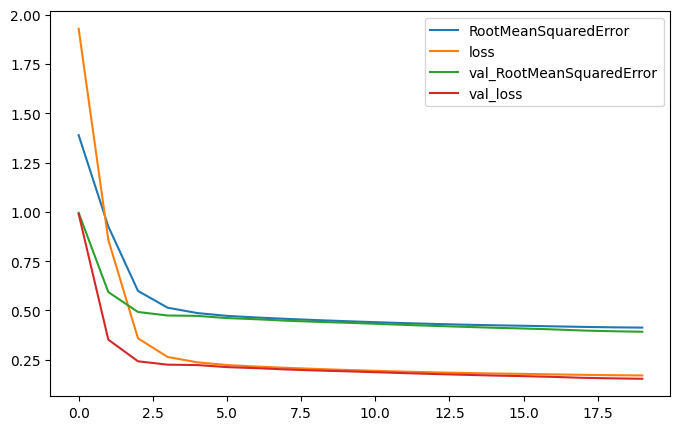

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
from sklearn.datasets import load_iris
iris_df = load_iris(as_frame=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = iris_df.data
y = iris_df.target
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [ ]:
# hidden 10,20,30
# 결합 방식은 함수형 API 방식
import tensorflow as tf
input = tf.keras.layers.Input(shape=x_train.shape[1:])
norm = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(10,activation='relu')
hidden2 = tf.keras.layers.Dense(20,activation='relu')
hidden3 = tf.keras.layers.Dense(30,activation='relu')
output = tf.keras.layers.Dense(3,activation='softmax')

# 결합
x = norm(input)
x = hidden1(x)
x = hidden2(x)
x = hidden3(x)
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 550ms/step - accuracy: 0.3438 - loss: 2.3332 - val_accuracy: 0.4583 - val_loss: 1.7489
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3438 - loss: 2.0492 - val_accuracy: 0.4583 - val_loss: 1.5868
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3438 - loss: 1.8239 - val_accuracy: 0.4583 - val_loss: 1.4673
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3438 - loss: 1.6473 - val_accuracy: 0.4583 - val_loss: 1.3798
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3438 - loss: 1.5124 - val_accuracy: 0.4583 - val_loss: 1.3154
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3438 - loss: 1.4052 - val_accuracy: 0.4583 - val_loss: 1.2620
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3438 - loss: 1.3170 - val_accuracy: 0.4583 - val_loss: 1.2144
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3438 - loss: 1.2412 - val_accuracy: 0.4583 - val_loss: 1.1680

In [ ]:
model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7000 - loss: 0.7057


[0.7057223916053772, 0.699999988079071]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

1.0

- 타이타닉

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

titanic_df = titanic_df.drop(['class', 'who', 'embarked', 'alive'],axis=1)
titanic_df = titanic.dropna()
X = titanic_df.drop('survived',axis=1)
y = titanic_df['survived']

X = pd.get_dummies(X)
# X = StandardScaler().fit_transform(X) --> normalize 하므로 불필요
X.shape, y.shape

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify = y, random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2, stratify= y_train, random_state=42)


# 딥러닝 모델 설계
import tensorflow as tf
input = tf.keras.layers.Input(shape=x_train.shape[1:])
norm = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(10,activation='relu')
hidden2 = tf.keras.layers.Dense(20,activation='relu')
hidden3 = tf.keras.layers.Dense(30,activation='relu')
output = tf.keras.layers.Dense(3,activation='softmax')

# 결합
x = norm(input)
x = hidden1(x)
x = hidden2(x)
x = hidden3(x)
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6825 - loss: 8.4458 - val_accuracy: 0.6897 - val_loss: 7.6327
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6825 - loss: 6.9162 - val_accuracy: 0.6897 - val_loss: 6.0901
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6825 - loss: 5.4805 - val_accuracy: 0.6897 - val_loss: 4.6477
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6825 - loss: 4.1153 - val_accuracy: 0.6897 - val_loss: 3.3089
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6825 - loss: 2.8356 - val_accuracy: 0.6897 - val_loss: 2.0568
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6825 - loss: 1.6956 - val_accuracy: 0.6207 - val_loss: 1.0943
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6348 - loss: 0.9914 - val_accuracy: 0.3448 - val_loss: 1.1637
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3584 - loss: 1.2534 - val_accuracy: 0.2759 - val_loss: 1.2426
Epoch 9/

In [ ]:
model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)          │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_31 (Normalization)     │ (None, 30)                  │              61 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 3)                   │              93 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,822 (14.94 KB)

 Trainable params: 1,253 (4.89 KB)

 Non-trainable params: 61 (248.00 B)

 Optimizer params: 2,508 (9.80 KB)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

titanic_df = titanic_df.drop(['class', 'who', 'embarked', 'alive'],axis=1)
titanic_df = titanic.dropna()
X = titanic_df.drop('survived',axis=1)
y = titanic_df['survived']

X = pd.get_dummies(X)
# X = StandardScaler().fit_transform(X) --> normalize 하므로 불필요
X.shape, y.shape

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify = y, random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2, stratify= y_train, random_state=42)


# 딥러닝 모델 설계
import tensorflow as tf
input = tf.keras.layers.Input(shape=x_train.shape[1:])
norm = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(10,activation='relu')
hidden2 = tf.keras.layers.Dense(20,activation='relu')
hidden3 = tf.keras.layers.Dense(30,activation='relu')
output = tf.keras.layers.Dense(1,activation='sigmoid')

# 이진분류 : binary_crossentropy
# 다중분류
  # 정답이 레이블 형태면 sparse_category_crossentropy
  # 정답이 원핫형태면 category_crossentropy
  # 데이터를 원핫으로 변경하고 category_crossentropy 성능이 좀 더 좋은 경우가 많음

# 결합
x = norm(input)
x = hidden1(x)
x = hidden2(x)
x = hidden3(x)
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))
model.evaluate(x_test,y_test)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.3175 - loss: nan - val_accuracy: 0.3103 - val_loss: nan
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3175 - loss: nan - val_accuracy: 0.3103 - val_loss: nan
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3175 - loss: nan - val_accuracy: 0.3103 - val_loss: nan
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3175 - loss: nan - val_accuracy: 0.3103 - val_loss: nan
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3175 - loss: nan - val_accuracy: 0.3103 - val_loss: nan
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3175 - loss: nan - val_accuracy: 0.3103 - val_loss: nan
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3175 - loss: nan - val_accuracy: 0.3103 - val_loss: nan
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3175 - loss: nan - val_accuracy: 0.3103 - val_loss: nan
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc

[nan, 0.3243243098258972]

In [ ]:
result = model.predict(x_test,y_test)
result

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().